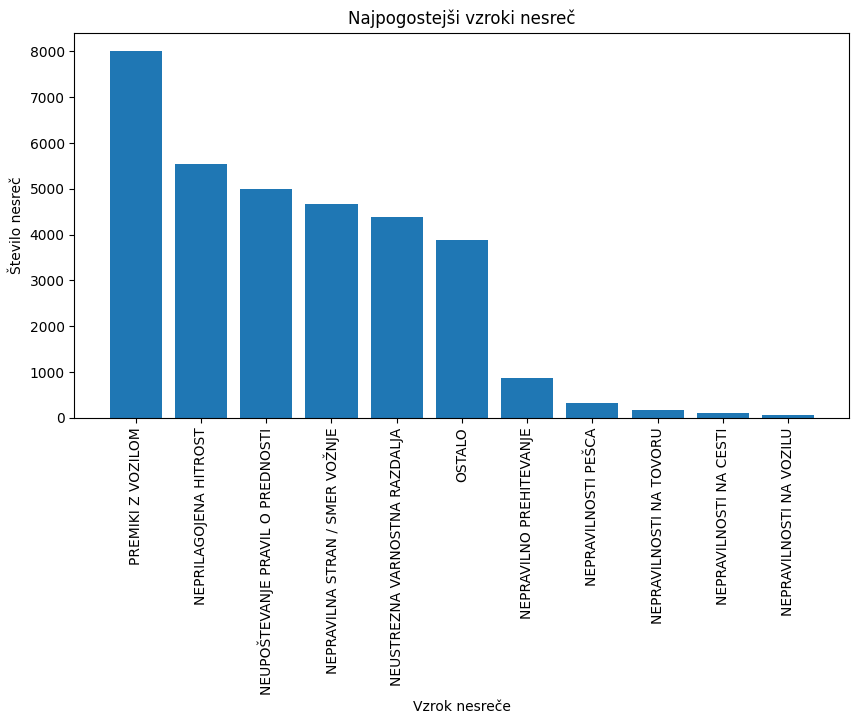

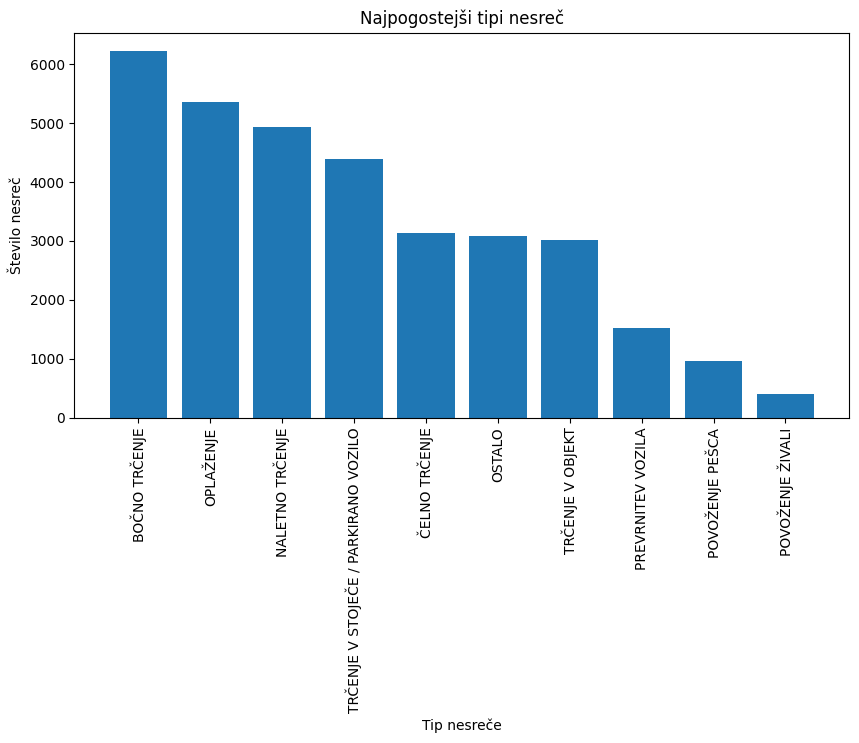

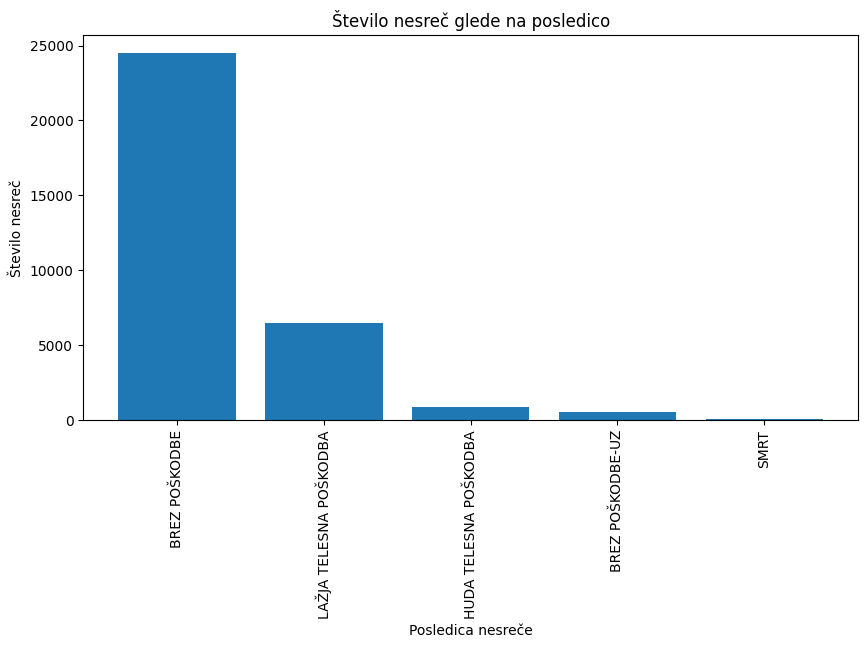

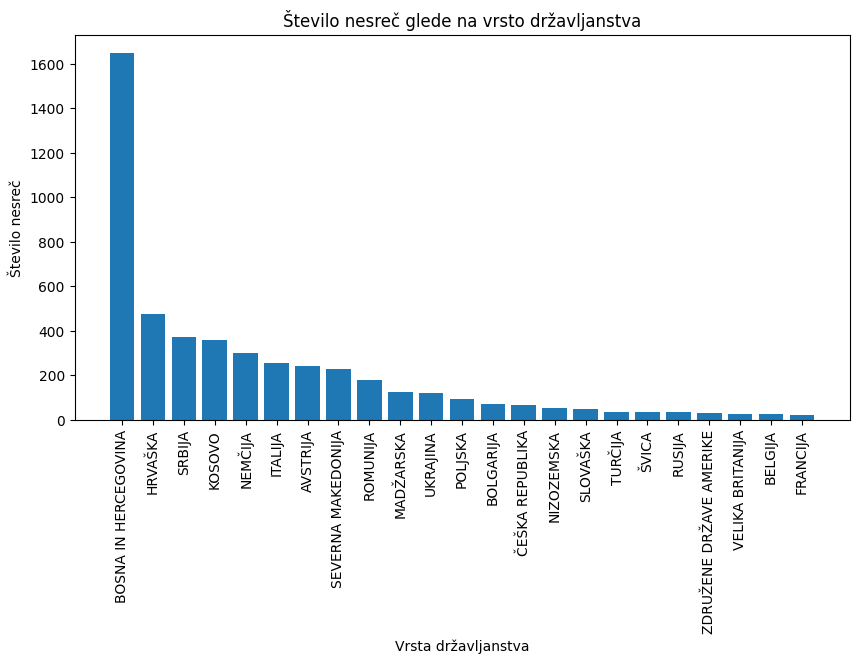

In [2]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('./baze/pn2022.csv', sep=';', decimal=',', encoding='utf-8')



vzroki = df['VzrokNesrece']


st_nesrec_po_vzrokih = vzroki.value_counts()


plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_vzrokih.index, st_nesrec_po_vzrokih.values)
plt.xticks(rotation=90)
plt.xlabel('Vzrok nesreče')
plt.ylabel('Število nesreč')
plt.title('Najpogostejši vzroki nesreč')
plt.show()


tipi = df['TipNesrece']

st_nesrec_po_tipih = tipi.value_counts()

plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_tipih.index, st_nesrec_po_tipih.values)
plt.xticks(rotation=90)
plt.xlabel('Tip nesreče')
plt.ylabel('Število nesreč')
plt.title('Najpogostejši tipi nesreč')
plt.show()

posledice = df['PoskodbaUdelezenca']


st_nesrec_po_posledicah = posledice.value_counts()


plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_posledicah.index, st_nesrec_po_posledicah.values)
plt.title("Število nesreč glede na posledico")
plt.xticks(rotation=90)
plt.xlabel("Posledica nesreče")
plt.ylabel("Število nesreč")
plt.show()


drzavljanstvo = df['Drzavljanstvo']
st_nesrec_po_drzavljanstvu = drzavljanstvo.value_counts().drop('SLOVENIJA').loc[lambda x: x > 20]
plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_drzavljanstvu.index, st_nesrec_po_drzavljanstvu.values)
plt.title("Število nesreč glede na vrsto državljanstva")
plt.xticks(rotation=90)
plt.xlabel("Vrsta državljanstva")
plt.ylabel("Število nesreč")
plt.show()

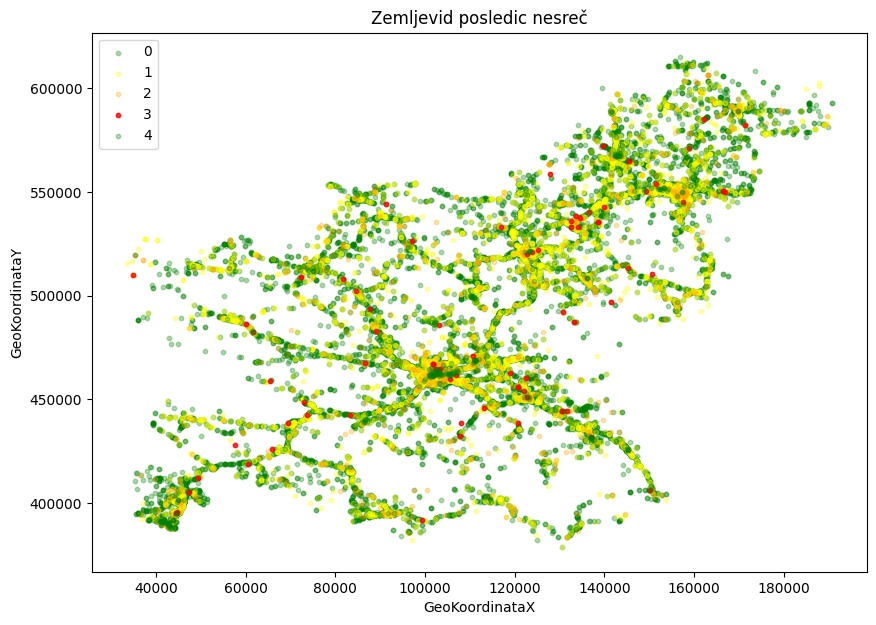

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

koordinate = pd.read_csv('./baze/manjse/Koordinate.csv')
osebe = pd.read_csv('./baze/manjse/Osebe.csv')
img = plt.imread('Slovenija.png')
nesreca = pd.merge(koordinate, osebe[['ZaporednaStevilkaOsebeVPN', 'PoskodbaUdelezenca']], on='ZaporednaStevilkaOsebeVPN', how='left')
nesreca = nesreca.drop(nesreca[(nesreca['GeoKoordinataX'] == 0) & (nesreca['GeoKoordinataY'] == 0)].index)
nesreca = nesreca.dropna(subset=['PoskodbaUdelezenca'])
nesreca['PoskodbaUdelezenca'] = nesreca['PoskodbaUdelezenca'].map({
'BREZ POŠKODBE': 0,
'LAŽJA TELESNA POŠKODBA': 1,
'HUDA TELESNA POŠKODBA': 2,
'SMRT': 3,
'BREZ POŠKODBE-UZ': 4
})
colors = ['green', 'yellow', 'orange', 'red', 'green']
fig, ax = plt.subplots(figsize=(10, 7))

for i, posledica in enumerate(sorted(nesreca['PoskodbaUdelezenca'].unique())):
    subset = nesreca[nesreca['PoskodbaUdelezenca'] == posledica]
    alpha = 0.8 if posledica == 3 else 0.3
    ax.scatter(subset['GeoKoordinataX'], subset['GeoKoordinataY'], s=10, alpha=alpha, c=colors[i], label=posledica)

ax.set_title('Zemljevid posledic nesreč')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
ax.legend()
plt.show()

In [50]:
nesreca = pd.read_csv('./baze/pn2022.csv', sep=';', decimal=',', encoding='utf-8')
nesreca = nesreca.drop(nesreca[(nesreca['GeoKoordinataX'] == 0) & (nesreca['GeoKoordinataY'] == 0)].index)
unikatne_poskodbe = nesreca['PoskodbaUdelezenca'].unique()
print(unikatne_poskodbe)

['BREZ POŠKODBE' 'LAŽJA TELESNA POŠKODBA' 'BREZ POŠKODBE-UZ'
 'HUDA TELESNA POŠKODBA' nan 'SMRT']
